# I. Analyses préliminaires 

## 1. Import et chargement 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy.stats import skew, kurtosis, pointbiserialr
from itertools import combinations

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel")

df = pd.read_csv("bank-full.csv", sep=';')

## 2. Description générale du jeu de données

In [3]:
display(df.head())
print("\nDimensions du dataset :", df.shape)

df.info()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



Dimensions du dataset : (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* Thème : marketing bancaire (campagne de souscription à un dépôt à terme)
* Objectif : prédire si le client souscrit (y)
* Unité d’observation : un contact client
* Source : Appels téléphonique de campagne de marketing
* période ~2008–2010
* nombre d'observations : 45211
* nombre de variables : 17

Variables continues :
- age : âge du client
- balance : solde moyen du compte bancaire
- duration : durée du dernier appel (en secondes)

Variables catégorielles :
- job, marital, education
- default, housing, loan
- contact, month, day
- poutcome
- campaign
- previous
- pdays (−1 = jamais contacté)
- y (variable cible)

# II. Variables individuelles (analyses univariées)

In [75]:
# Préparation technique légère
df['y_bin'] = df['y'].map({'yes':1, 'no':0}).astype('int8')
cont_cols = ["age", "balance", "duration"]
cat_cols = [c for c in df.columns if c not in cont_cols]

## 1. Modalits des variables catégorielles 

In [77]:
rows = []
for c in cat_cols:
    mods = sorted(df[c].dropna().unique())
    rows.append({"variable": c, "nb_modalites": len(mods), "modalites": mods})

mods_table = pd.DataFrame(rows).sort_values("nb_modalites", ascending=False)

pd.set_option("display.max_colwidth", None)
mods_table


,variable,nb_modalites,modalites
10,pdays,559,"[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, ...]"
9,campaign,48,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 44, 46, 50, 51, 55, 58, 63]"
11,previous,41,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 35, 37, 38, 40, 41, 51, 55, 58, 275]"
7,day,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
0,job,12,"[admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown]"
8,month,12,"[apr, aug, dec, feb, jan, jul, jun, mar, may, nov, oct, sep]"
2,education,4,"[primary, secondary, tertiary, unknown]"
12,poutcome,4,"[failure, other, success, unknown]"
1,marital,3,"[divorced, married, single]"
6,contact,3,"[cellular, telephone, unknown]"


| Variable | Type (statistique) | Description | Modalités / Remarques |
|---------|-------------------|-------------|------------------------|
| age | Continue | Âge du client | Valeurs entre 18 et 95 |
| job | Catégorielle | Type d’emploi | admin., blue-collar, services, technician, management, entrepreneur, student, retired, self-employed, unemployed, housemaid, unknown |
| marital | Catégorielle | Statut marital | married, single, divorced |
| education | Catégorielle | Niveau d’éducation | primary, secondary, tertiary, unknown |
| default | Catégorielle (binaire) | Défaut de crédit | yes, no |
| balance | Continue | Solde annuel moyen du compte (€) | Peut être négatif |
| housing | Catégorielle (binaire) | Prêt immobilier | yes, no |
| loan | Catégorielle (binaire) | Prêt personnel | yes, no |
| contact | Catégorielle | Type de contact | cellular, telephone, unknown |
| day | Catégorielle (ordinale) | Jour du mois du dernier contact | 1 à 31 |
| month | Catégorielle | Mois du dernier contact | jan, feb, mar, …, nov, dec |
| duration | Continue | Durée du dernier appel (secondes) | Connue après l’appel |
| campaign | Catégorielle (discrète) | Nb de contacts pendant la campagne en cours | Inclut le dernier contact |
| pdays | Catégorielle (codée) | Jours depuis le dernier contact antérieur | -1 = jamais contacté |
| previous | Catégorielle (discrète) | Nb de contacts avant cette campagne | 0,1,... |
| poutcome | Catégorielle | Résultat de la campagne précédente | success, failure, other, unknown |
| y | Cible (binaire) | Souscription à un dépôt à terme | yes, no |

## 2. Statistiques descriptives générales 

In [78]:
# Statistiques descriptives des variables numériques
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0


In [79]:
# modes des variables catégorielles 
for c in cat_cols:
    mode_val = df[c].mode(dropna=True).iloc[0]
    mode_freq = df[c].value_counts(normalize=True, dropna=True).iloc[0] * 100
    print(f"{c:15s} -> mode : {str(mode_val):20s} ({mode_freq:5.2f}%)")

job             -> mode : blue-collar          (21.53%)
marital         -> mode : married              (60.19%)
education       -> mode : secondary            (51.32%)
default         -> mode : no                   (98.20%)
housing         -> mode : yes                  (55.58%)
loan            -> mode : no                   (83.98%)
contact         -> mode : cellular             (64.77%)
day             -> mode : 20                   ( 6.09%)
month           -> mode : may                  (30.45%)
campaign        -> mode : 1                    (38.80%)
pdays           -> mode : -1                   (81.74%)
previous        -> mode : 0                    (81.74%)
poutcome        -> mode : unknown              (81.75%)
y               -> mode : no                   (88.30%)
y_bin           -> mode : 0                    (88.30%)


On observe que le mode de la variable pdays est égal à −1 et celui de la variable poutcome est "unknown", au taux de 81.74% correspondant au taux des clients n'ayant été pas contactés auparavant (previous avec un mode 0)

## 3. Valeurs manquantes (ou pseudo-manquantes) 

In [80]:
na_rate = df.isna().mean().sort_values(ascending=False)
print("Taux global de valeurs manquantes (top):")
display(na_rate[na_rate>0])

# Concentration des NA par sous-groupes (si présent)
for g in ['job','education','marital','contact','month','poutcome','housing','loan']:
    if g in df.columns:
        tmp = df.groupby(g).apply(lambda x: x.isna().mean()).T
        if (tmp != 0).any().any():
            print(f"\nTaux de NA par {g} :")
            display(tmp.loc[:, (tmp!=0).any(axis=0)])

Taux global de valeurs manquantes (top):


Series([], dtype: float64)

L’analyse des valeurs manquantes montre que **le dataset ne contient aucune valeur manquante au sens strict** (`NaN`).  
Toutes les colonnes présentent un taux de NA égal à **0 %**.

Cela s’explique par le fait que la base `bank-full.csv` utilise des **codes internes** pour représenter des “non-applicables” plutôt que des NA, par exemple :

- `pdays = -1` signifie “**jamais contacté auparavant**”
- `poutcome = unknown` signifie “**pas de campagne précédente**”

Ces valeurs ne doivent **pas** être traitées comme des manquants mais comme des **modalités informatives**. Elles traduisent le fait que la grande majorité des clients sont **nouveaux** dans les campagnes.

In [81]:
# Focus sur les pseudo-manquantes : 
pseudo_missing = {
    "pdays": [-1],
    "poutcome": ["unknown", "other"],
    "job": ["unknown"],
    "education": ["unknown"],
    "contact": ["unknown"]
}

n = len(df)

for c, codes in pseudo_missing.items():
        print(f"\n{c}:")
        for code in codes:
            pct = (df[c] == code).mean() * 100
            print(f"  - {code}: {pct:.2f}%")


pdays:
  - -1: 81.74%

poutcome:
  - unknown: 81.75%
  - other: 4.07%

job:
  - unknown: 0.64%

education:
  - unknown: 4.11%

contact:
  - unknown: 28.80%


L’analyse des valeurs pseudo-manquantes met en évidence l’utilisation de codes internes pour représenter une absence d’information plutôt que des valeurs manquantes au sens statistique. En particulier, 81.74 % des observations présentent pdays = -1, indiquant des clients n’ayant jamais été contactés lors de campagnes précédentes. De même, 81.75 % des clients ont un poutcome = "unknown", et 4.07 % un poutcome = "other", traduisant l’absence ou l’indétermination de l’issue d’une campagne antérieure. D’autres variables contiennent également des modalités "unknown", notamment contact (28.80 %), education (4.11 %) et job (0.64 %). Ces modalités sont conservées comme informatives et ne sont pas traitées comme des valeurs manquantes.

In [82]:
# variable poutcome :
pd.crosstab(df["poutcome"], df["y"], normalize="index")

y,no,yes
poutcome,,
failure,0.873903,0.126097
other,0.833152,0.166848
success,0.352747,0.647253
unknown,0.908385,0.091615


La modalité "unknown" de la variable poutcome correspond à une absence d’information sur une campagne précédente, tandis que "other" indique l’existence d’un contact antérieur dont l’issue n’est ni un succès ni un échec clairement identifié. L’analyse du taux de souscription montre des comportements significativement différents entre ces deux modalités (9.2 % vs 16.7 %), justifiant leur traitement séparé dans l’analyse et la modélisation. 

## 4. Forme des distributions et valeurs extrêmes

### 4.1 Variables continues (histogrammes) 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


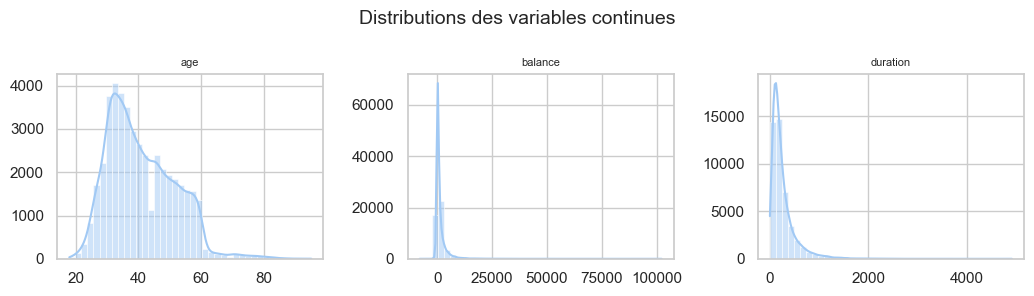

In [104]:

def plot_variable_distributions(df, columns, cols=3, bins=40):
    import math
    rows = math.ceil(len(columns) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3.5, rows*3))
    axes = axes.flatten()
    
    for i, c in enumerate(columns):
        sns.histplot(df[c], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(c, fontsize=8)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    fig.suptitle('Distributions des variables continues', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_variable_distributions(df, cont_cols)


### 4.2 Variables continues (valeurs aberrantes) 

In [84]:
# IQR
def outlier_iqr_summary(df, cols):
    rows = []
    for c in cols:
        s = df[c].dropna()
        if s.empty:
            rows.append([c, 0, 0, np.nan, np.nan])
            continue
        q1, q3 = s.quantile([0.25, 0.75])
        iqr = q3 - q1
        low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
        n_low, n_high = int((s<low).sum()), int((s>high).sum())
        rows.append([c, n_low, n_high, float(low), float(high)])
    return pd.DataFrame(rows, columns=['var','n_low','n_high','low_bound','high_bound'])

outlier_df = outlier_iqr_summary(df, cont_cols)
display(outlier_df.sort_values(['n_low','n_high'], ascending=False))

,var,n_low,n_high,low_bound,high_bound
1,balance,17,4712,-1962.0,3462.0
2,duration,0,3235,-221.0,643.0
0,age,0,487,10.5,70.5


| Variable  | Interprétation |
|----------|----------------|
| age | Distribution unimodale centrée autour de 40 ans (médiane ≈ 38 ans) → population adulte active. L’âge varie de 17 à 98 ans, donc quelques clients très âgés mais plausibles. Distribution légèrement **asymétrique à droite** (plus de jeunes que de très vieux). |
| balance | Distribution fortement asymétrique à droite, avec une concentration de valeurs proches de zéro et la présence de soldes négatifs. Quelques valeurs extrêmes positives traduisent une forte hétérogénéité des situations financières. |
| duration | Moyenne ≈ **258 s (~4 min)**, mais **écart-type très élevé (259)** → forte variabilité dans la durée des appels. Max = 4918 s (>1 h 20) : **quelques appels extrêmement longs**. Distribution **très biaisée à droite**.  **Attention :** cette variable ne doit pas être utilisée en modélisation car elle n’est connue qu’après l’appel (fuite d’information). |

L’analyse IQR met en évidence la présence de **nombreuses valeurs extrêmes** dans :
#### `duration`
- Plusieurs milliers d’observations au-dessus du seuil supérieur.
- Cela confirme la **forte asymétrie à droite** observée dans les histogrammes.
- Ces valeurs extrêmes correspondent à des **appels très longs** (jusqu’à 4918 s), plausibles mais rares.
- Comme indiqué précédemment, `duration` ne doit **pas** être utilisée comme variable prédictive (fuite d’information).
#### `balance`
- Présence d’un grand nombre de valeurs extrêmes, principalement du côté positif.
- La distribution est fortement asymétrique à droite, avec une concentration d’observations autour de valeurs proches de zéro.
- Les valeurs aberrantes correspondent à des soldes bancaires très élevés, traduisant une forte hétérogénéité des situations financières des clients.
- Ces valeurs, bien que rares, sont économiquement plausibles et ne constituent pas des erreurs de mesure.

L’analyse des valeurs aberrantes selon la règle de l’IQR met en évidence une forte présence d’observations extrêmes pour les variables *balance* et *duration*, en cohérence avec leurs distributions très asymétriques à droite.  
Ces valeurs ne sont pas nécessairement erronées mais traduisent une forte hétérogénéité des comportements financiers et des durées d’appel.  
La variable *age* présente peu de valeurs aberrantes, confirmant une dispersion plus modérée.

### 4.3 Variables catégorielles 

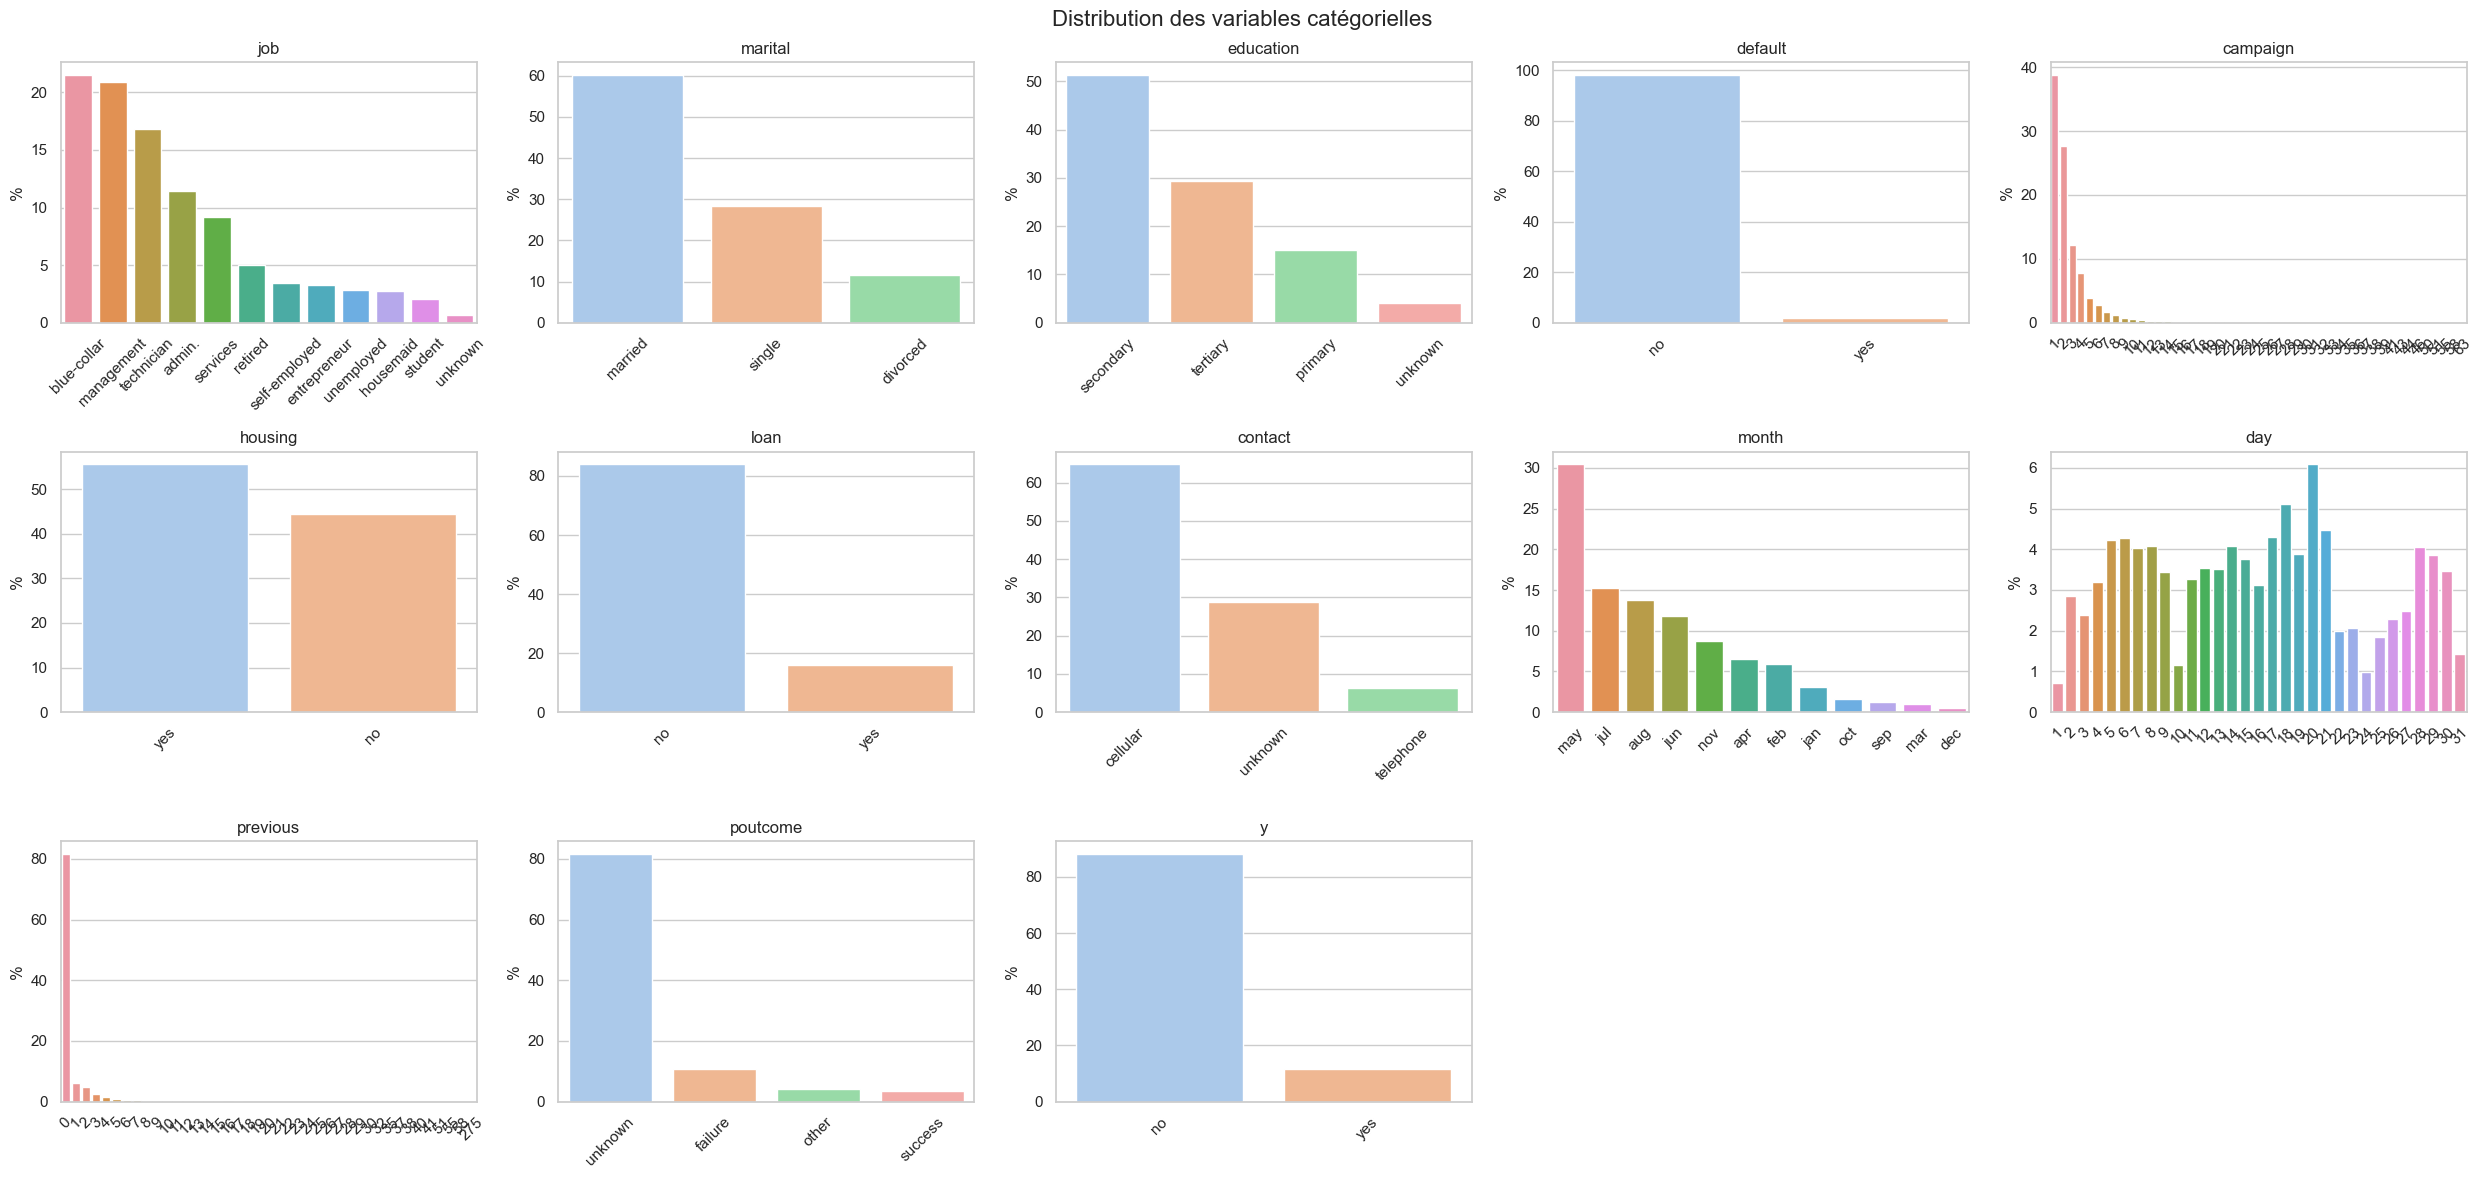

In [ ]:
# on exclut volntairement la colonne pdays 
cat_cols_plot = [
    "job", "marital", "education", "default", "campaign", "housing", "loan", "contact", "month", "day","previous","poutcome"
]
cols = 5 
rows = math.ceil(len(cat_cols_plot) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for ax, c in zip(axes, cat_cols_plot):
    vc = df[c].value_counts(normalize=True).mul(100)
    sns.barplot(x=vc.index, y=vc.values, ax=ax)
    ax.set_title(c)
    ax.set_ylabel("%")
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)

# Supprimer les axes vides
for i in range(len(cat_cols_plot), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Distribution des variables catégorielles", fontsize=16)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


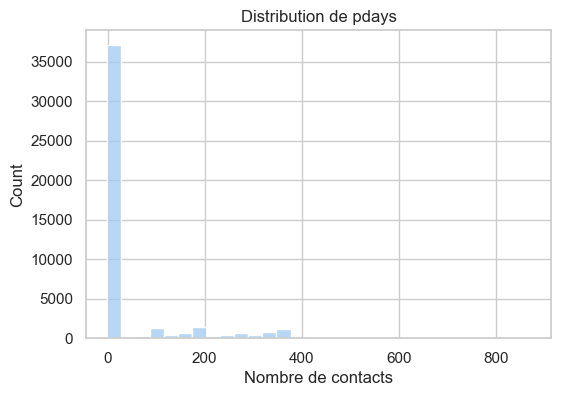

In [87]:
# variable pdays
plt.figure(figsize=(6,4))
sns.histplot(df["pdays"], bins=30)
plt.title("Distribution de pdays")
plt.xlabel("Nombre de contacts")
plt.show()

| Variable   | Interprétation |
|-----------|----------------|
| job | Forte hétérogénéité des professions. Les catégories *blue-collar*, *management* et *technician* sont les plus représentées, tandis que certaines professions (student, retired, unemployed) sont marginales. |
| marital | La majorité des clients est mariée, suivie des célibataires. Les clients divorcés sont nettement moins représentés. |
| education | Les niveaux *secondary* et *tertiary* dominent. La modalité *unknown* est minoritaire mais non négligeable, traduisant une information non renseignée. |
| default | La quasi-totalité des clients n’est pas en défaut de paiement, ce qui rend cette variable très déséquilibrée. |
| housing | Répartition relativement équilibrée entre clients avec et sans prêt immobilier, avec une légère majorité de clients ayant un prêt. |
| loan | La majorité des clients ne possède pas de prêt personnel. |
| contact | Le canal *cellular* est largement dominant, reflétant l’évolution des pratiques de contact. La modalité *unknown* reste présente. |
| month | Forte saisonnalité des contacts, concentrés principalement sur les mois de mai, juillet et août. |
| day | Répartition relativement homogène sur les jours du mois, sans structure dominante marquée. |
| campaign | Variable très asymétrique : la majorité des clients est contactée une à deux fois, tandis que des valeurs élevées correspondent à des relances multiples rares. |
| pdays | Variable à codage spécifique : la valeur −1 indique que le client n’a jamais été contacté auparavant. Cette modalité est largement majoritaire. |
| previous | La plupart des clients n’ont jamais été contactés auparavant, les valeurs positives étant peu fréquentes. Quelques valeurs extrêmes (jusqu’à 7 contacts précédents). Rien d’incohérent : ce sont simplement des clients très sollicités. |
| poutcome | La modalité *unknown* est largement majoritaire, indiquant l’absence de campagne précédente pour la majorité des clients. Les succès et échecs sont minoritaires. |
| y | Variable cible fortement déséquilibrée : une large majorité des clients n’a pas souscrit au produit bancaire. |


### Synthèse 

- Le **profil type** du client contacté est :  
  > *un adulte marié (~40 ans), diplômé universitaire, employé administratif, avec prêt logement, contacté par téléphone portable en mai, souvent un jeudi, et n’ayant jamais été contacté auparavant.*

- Le dataset est **très déséquilibré** (`y_bin` = 11 % de “yes”).  

# III. Relations entre variables (bivariées / multivariées)


## 1. Corrélations entre variables quantitatives

Bien que certaines variables soient numériques au sens informatique, elles correspondent à des variables discrètes ou à des codes spécifiques.  
Les corrélations présentées ci-dessous sont utilisées uniquement à des fins exploratoires.

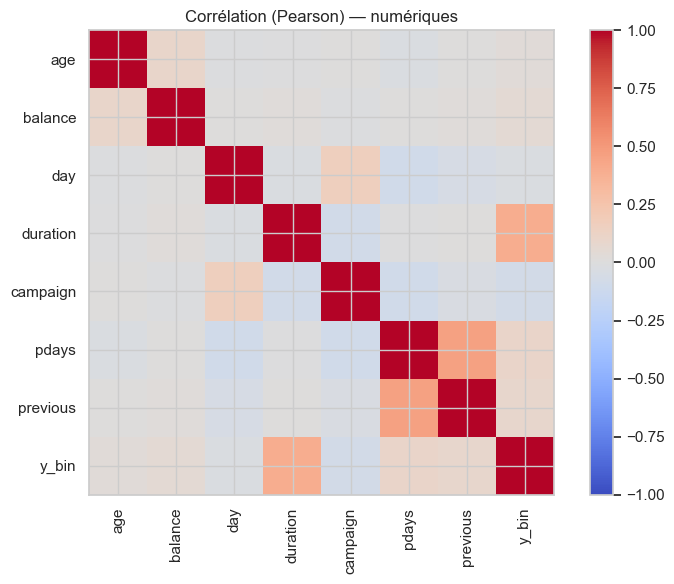

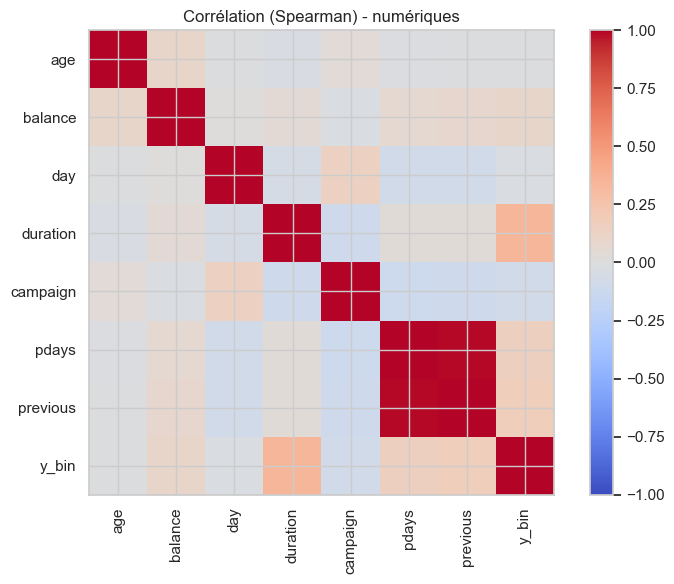

In [88]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
corr_p = df[num_cols].corr(method='pearson')
corr_s = df[num_cols].corr(method='spearman')

# Heatmap Pearson
fig = plt.figure(figsize=(8,6))
plt.imshow(corr_p, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title("Corrélation (Pearson) — numériques")
plt.xticks(ticks=np.arange(len(num_cols)), labels=num_cols, rotation=90)
plt.yticks(ticks=np.arange(len(num_cols)), labels=num_cols)
plt.tight_layout(); plt.show()

# Heatmap Spearman
fig = plt.figure(figsize=(8,6))
plt.imshow(corr_s, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title("Corrélation (Spearman) - numériques")
plt.xticks(ticks=np.arange(len(num_cols)), labels=num_cols, rotation=90)
plt.yticks(ticks=np.arange(len(num_cols)), labels=num_cols)
plt.tight_layout(); plt.show()

#### 1. Corrélation structurelle entre `pdays` et `previous`

Les matrices de corrélation (**Pearson** et **Spearman**) mettent en évidence une **forte corrélation positive** entre `pdays` et `previous`.

Cette relation est cohérente avec la **construction des variables** :
- Les clients ayant déjà été contactés (`previous > 0`) ont nécessairement un délai (`pdays`) mesurable depuis le dernier contact.
- À l’inverse, la modalité `pdays = -1` correspond à une **absence totale de contact antérieur**, ce qui renforce artificiellement la structure de corrélation.

**Conséquence :**  
Ces deux variables véhiculent une information **partiellement redondante** liée à l’historique de contact, ce qui peut engendrer un **risque de multicolinéarité** dans les modèles linéaires.

#### 2. Corrélation marquée entre `duration` et la cible `y_bin`

Les corrélations de **Pearson** et de **Spearman** montrent une **relation positive nette** entre `duration` et `y_bin`.

- Les appels plus longs sont significativement associés à une **probabilité plus élevée de souscription**.
- Toutefois, cette corrélation est **structurelle et non causale** : la durée de l’appel est connue **après** l’interaction.

Malgré son fort pouvoir explicatif apparent, `duration` constitue une **fuite d’information (data leakage)** et **ne doit pas être utilisée** comme variable prédictive.

#### 3. Corrélations faibles entre `campaign` et les autres variables

La variable `campaign` présente des **corrélations faibles** avec l’ensemble des autres variables numériques.

Cela suggère que :
- Le nombre de contacts durant la campagne relève davantage d’une **stratégie commerciale**,
- Que d’un **profil client** ou d’un **historique relationnel**.

**Interprétation :**  
L’information portée par `campaign` semble **complémentaire**, mais probablement **non linéaire**.

#### 4. `age` et `balance` quasi indépendantes des autres variables

- `age` présente une **corrélation très faible** avec l’ensemble des variables numériques.
- `balance` est également **peu corrélée** aux autres variables, malgré :
  - une forte dispersion,
  - des valeurs extrêmes.

**Interprétation :**  
Ces variables capturent des **dimensions distinctes** du profil client.

#### 5. Corrélation globale faible avec la cible (hors `duration`)

À l’exception de `duration`, **aucune variable numérique** ne présente de corrélation linéaire forte avec `y_bin`.

Cela suggère que la relation entre la souscription et les variables explicatives est :
- soit **non linéaire**,
- soit principalement portée par les **variables catégorielles**,
- soit issue d’**interactions entre variables**.

---

### Conclusion

La structure de corrélation met en évidence :

- un **bloc redondant** lié à l’historique de contact (`pdays`, `previous`),
- une variable fortement corrélée à la cible mais **non exploitable** (`duration`),
- un ensemble de variables numériques **faiblement corrélées entre elles**, suggérant une information **complémentaire mais non linéaire**.

Ces résultats **justifient l’usage de modèles non linéaires** et soulignent l’**importance des variables catégorielles** dans la phase de modélisation.


## 2. Variation d'une variable continue selon une catégorielle (boxplots)

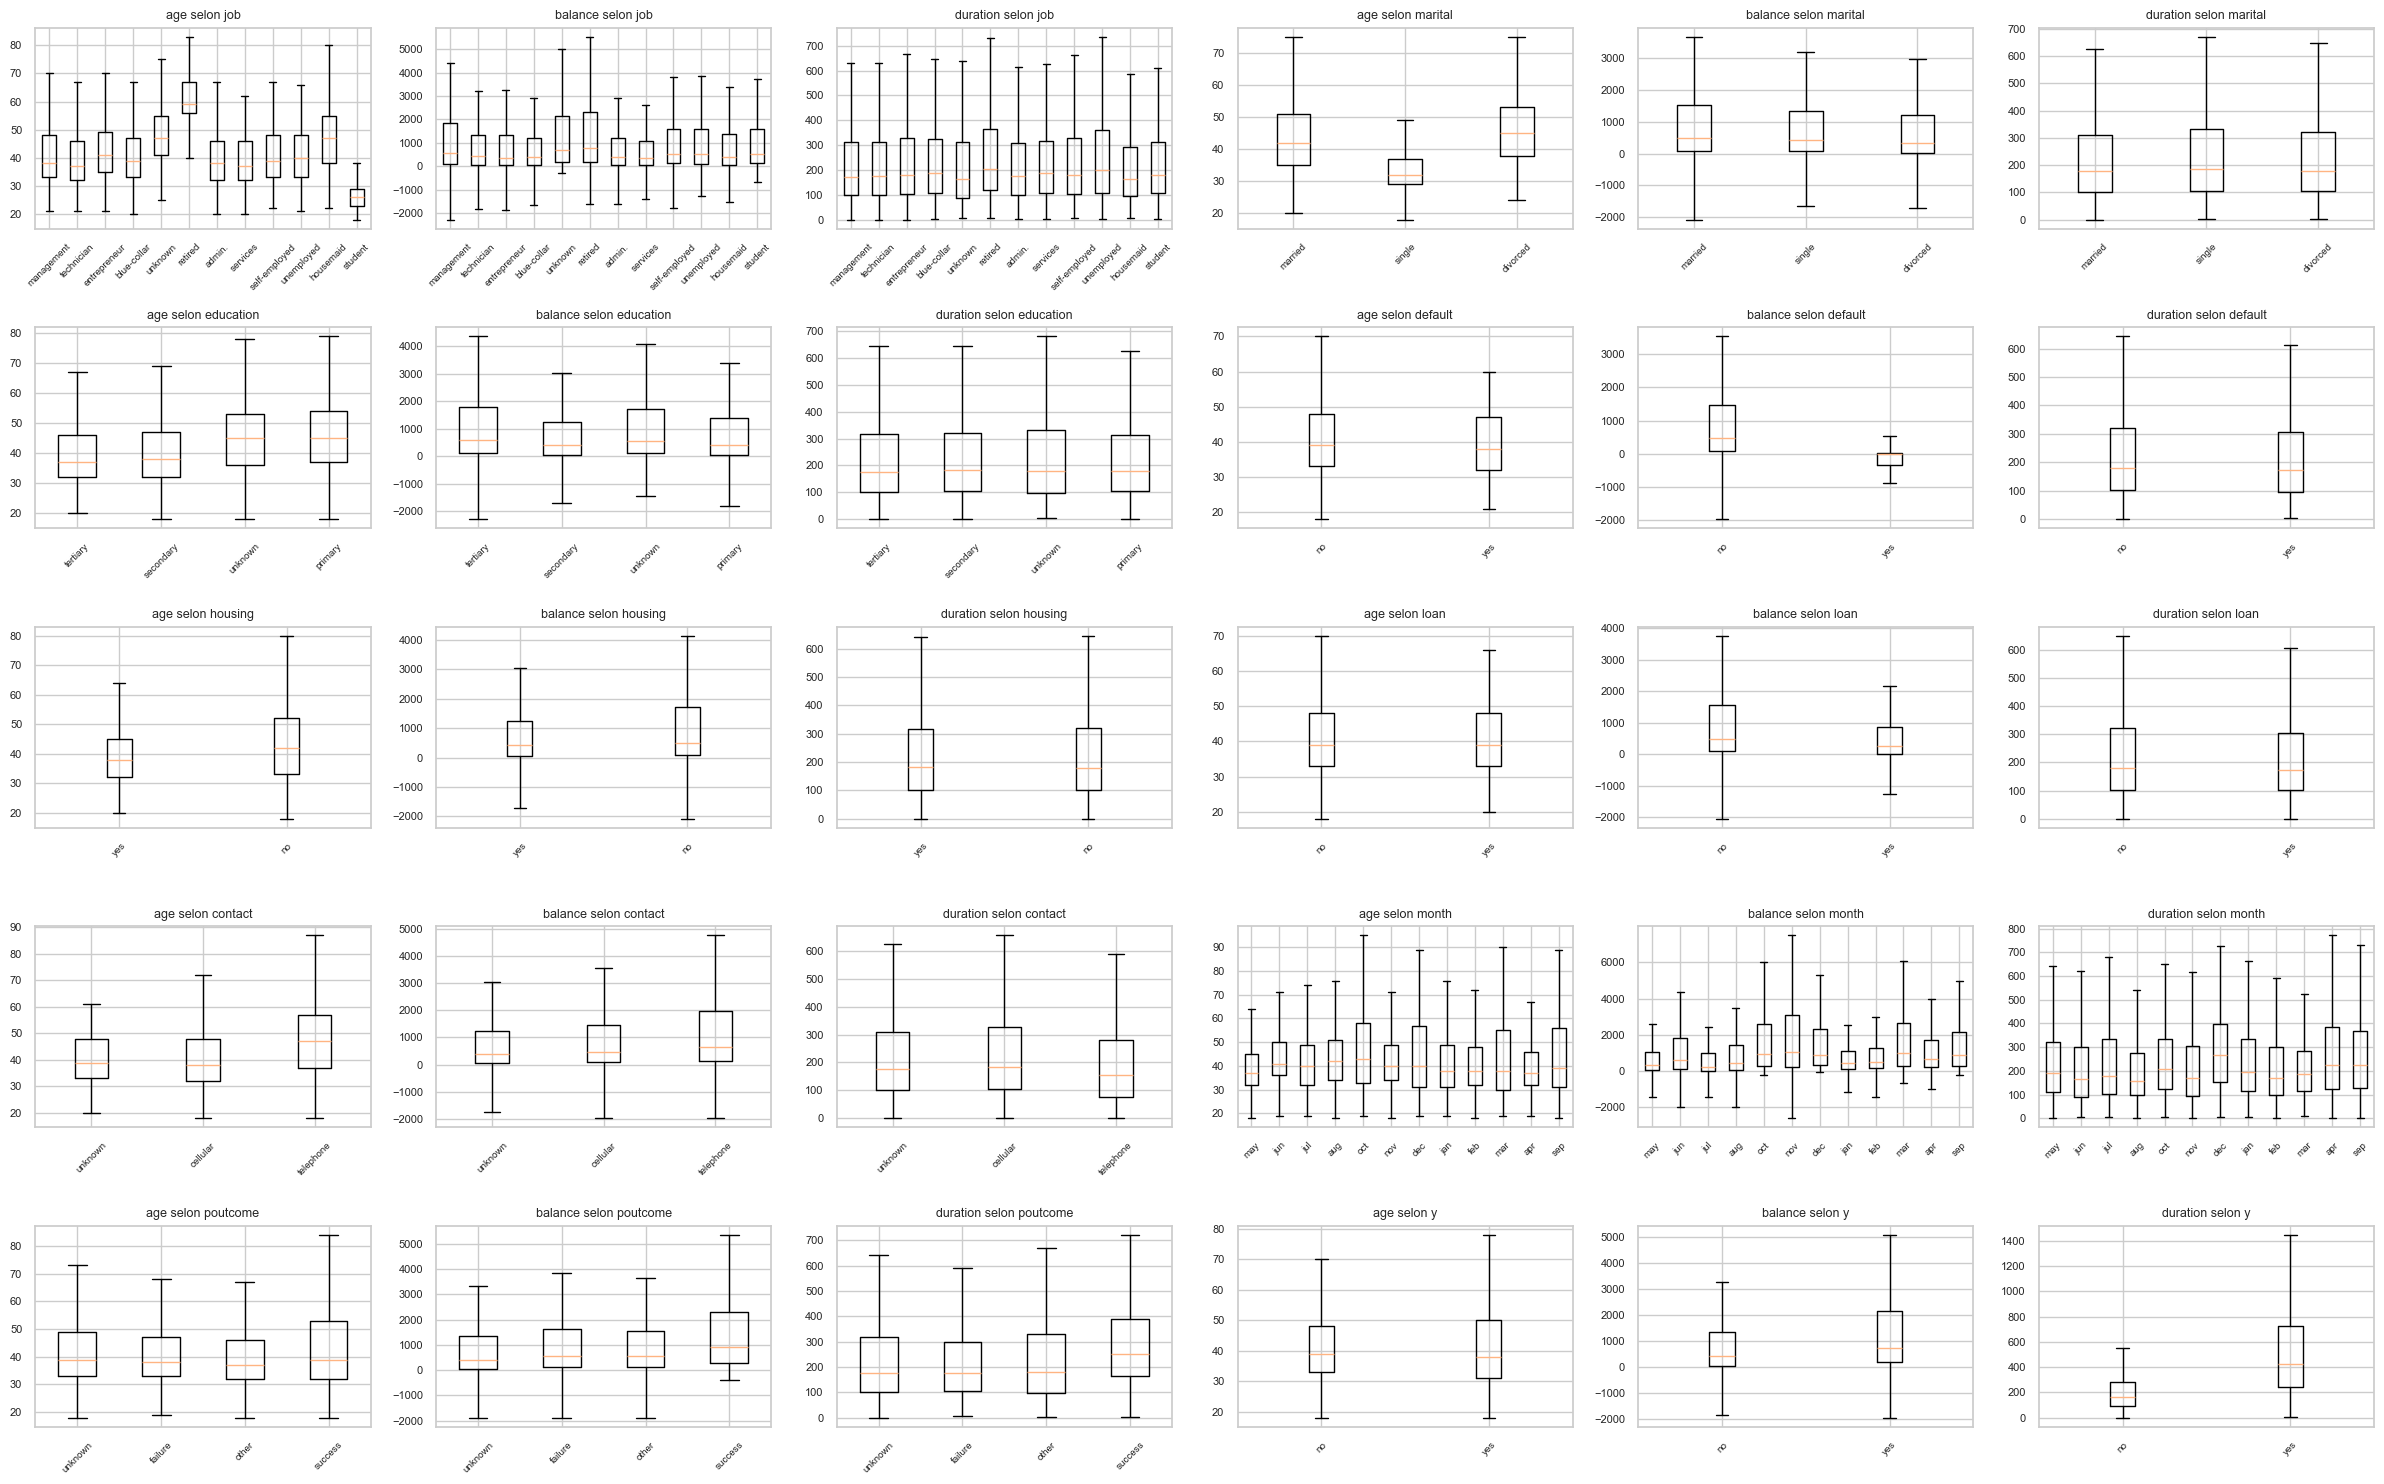

In [89]:
import math 
cats_small = [c for c in cat_cols if c != 'y_bin' and df[c].nunique() <= 12]
nums_small = [c for c in cont_cols ]

# Toutes les paires (catégorie, numérique)
pairs = [(g, v) for g in cats_small for v in nums_small]

per_row = 6
n = len(pairs)
nrows = math.ceil(n / per_row)

fig, axes = plt.subplots(nrows, per_row, figsize=(4*per_row, 3*nrows))
axes = np.atleast_1d(axes).ravel()

for ax, (g, v) in zip(axes, pairs):
    groups = [df.loc[df[g] == k, v].dropna().values for k in df[g].dropna().unique()]
    labels = list(df[g].dropna().unique())
    ax.boxplot(groups, labels=labels, showfliers=False)
    ax.set_title(f"{v} selon {g}", fontsize=9)
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=8)

for ax in axes[len(pairs):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


L’analyse des boxplots permet d’examiner comment les variables numériques (`age`, `balance`, `duration`) varient selon les différentes variables catégorielles. L’ensemble des combinaisons a été exploré, mais seules les relations présentant des différences de distribution claires et interprétables sont commentées ci-dessous.

#### 1. `age` présente des variations nettes selon les caractéristiques socio-démographiques

- L’âge varie fortement selon la variable `job` :
  - Les individus **retraités** ont logiquement les âges médians les plus élevés.
  - Les catégories telles que `student`, `services` ou `blue-collar` regroupent des individus plus jeunes.
- Selon `marital`, les **personnes mariées ou divorcées** présentent une médiane d’âge plus élevée que les célibataires.
- Le niveau d’`education` montre également un gradient :
  - Les niveaux `primary` et `secondary` sont associés à des âges plus élevés que `tertiary`.

Ces différences sont cohérentes d’un point de vue socio-économique et indiquent que `age` est une variable **discriminante selon le profil client**.

#### 2. `balance` montre une hétérogénéité importante mais peu de séparation nette entre catégories

- Quel que soit le facteur catégoriel considéré (`job`, `education`, `marital`, `housing`, `loan`), la variable `balance` présente :
  - une **forte dispersion**
  - de nombreux **outliers positifs et négatifs**
- Certaines catégories (par exemple certains métiers ou niveaux d’éducation) montrent des médianes légèrement plus élevées, mais :
  - les distributions se chevauchent fortement
  - les écarts inter-catégories restent modestes

Ainsi, `balance` reflète surtout une **hétérogénéité individuelle des situations financières**, avec un pouvoir discriminant limité en analyse bivariée simple.

#### 3. `duration` varie peu selon les catégories clients

- Pour toutes les variables catégorielles étudiées, les boxplots de `duration` présentent :
  - une forte asymétrie à droite
  - une dispersion élevée dans **toutes les catégories**
- Les médianes sont globalement proches entre groupes, avec parfois de légères différences selon `job` ou `contact`, mais sans séparation nette.

Cela confirme que `duration` dépend principalement du **déroulement de l’appel** plutôt que des caractéristiques du client.  
De plus, comme établi précédemment, `duration` constitue une **fuite d’information** et ne doit pas être utilisée comme variable prédictive.

#### 4. Variables catégorielles liées à la campagne : peu de différenciation client

- Les variables telles que `contact`, `month` ou `poutcome` n’induisent pas de différences marquées dans les distributions de `age`, `balance` ou `duration`.
- Les boxplots correspondants montrent :
  - des médianes proches
  - un fort recouvrement des distributions

Ces variables décrivent davantage le **contexte ou la stratégie de la campagne** que des caractéristiques intrinsèques des clients.

### Conclusion

- Parmi les variables numériques étudiées, **`age` est celle qui varie le plus clairement selon les caractéristiques client**, ce qui en fait une variable informative en analyse bivariée.
- `balance` présente une grande variabilité mais peu de structure discriminante entre catégories.
- `duration` varie peu selon les profils clients et reflète principalement la dynamique de l’appel.
- La majorité des relations entre variables numériques et catégorielles ne présentent pas de séparation nette, suggérant que les effets discriminants émergeront surtout :
  - via des **interactions multivariées**
  - ou des **modèles non linéaires**

Cette analyse fournit une base descriptive solide pour orienter les choix de modélisation ultérieurs.


## 3. Taux de souscription par catégorie (rate, lift, IC95%)


=== job vs y ===


,count,rate,se,ci_low,ci_high,lift
job,,,,,,
student,938,0.286780,0.014767,0.257838,0.315723,2.451433
retired,2264,0.227915,0.008816,0.210635,0.245195,1.948246
unemployed,1303,0.155027,0.010027,0.135375,0.174679,1.325188
management,9458,0.137556,0.003542,0.130614,0.144497,1.175841
admin.,5171,0.122027,0.004552,0.113105,0.130948,1.043099
self-employed,1579,0.118429,0.008131,0.102492,0.134367,1.012348
unknown,288,0.118056,0.019014,0.080789,0.155322,1.009153
technician,7597,0.110570,0.003598,0.103518,0.117622,0.945165
services,4154,0.088830,0.004414,0.080178,0.097482,0.759330



=== marital vs y ===


,count,rate,se,ci_low,ci_high,lift
marital,,,,,,
single,12790,0.149492,0.003153,0.143312,0.155672,1.277874
divorced,5207,0.119455,0.004495,0.110645,0.128264,1.021112
married,27214,0.101235,0.001828,0.097651,0.104818,0.865366



=== education vs y ===


,count,rate,se,ci_low,ci_high,lift
education,,,,,,
tertiary,13301,0.150064,0.003097,0.143995,0.156133,1.282764
unknown,1857,0.135703,0.007947,0.120126,0.151279,1.160003
secondary,23202,0.105594,0.002018,0.101640,0.109549,0.902633
primary,6851,0.086265,0.003392,0.079617,0.092913,0.737402



=== default vs y ===


,count,rate,se,ci_low,ci_high,lift
default,,,,,,
no,44396,0.117961,0.001531,0.114961,0.120962,1.008345
yes,815,0.063804,0.008561,0.047024,0.080583,0.545401



=== housing vs y ===


,count,rate,se,ci_low,ci_high,lift
housing,,,,,,
no,20081,0.167024,0.002632,0.161865,0.172183,1.427737
yes,25130,0.077000,0.001682,0.073703,0.080296,0.658202



=== loan vs y ===


,count,rate,se,ci_low,ci_high,lift
loan,,,,,,
no,37967,0.126557,0.001706,0.123213,0.129902,1.081827
yes,7244,0.066814,0.002934,0.061064,0.072564,0.571133



=== contact vs y ===


,count,rate,se,ci_low,ci_high,lift
contact,,,,,,
cellular,29285,0.149189,0.002082,0.145108,0.153270,1.275285
telephone,2906,0.134205,0.006323,0.121811,0.146599,1.147201
unknown,13020,0.040707,0.001732,0.037312,0.044101,0.347965



=== day vs y ===


,count,rate,se,ci_low,ci_high,lift
day,,,,,,
1,322,0.279503,0.025008,0.230487,0.328519,2.389226
10,524,0.230916,0.018410,0.194833,0.266999,1.973898
30,1566,0.173052,0.009559,0.154316,0.191789,1.479272
22,905,0.170166,0.012491,0.145683,0.194649,1.454597
3,1079,0.164968,0.011299,0.142822,0.187114,1.410162
4,1445,0.159170,0.009624,0.140307,0.178032,1.360600
25,840,0.158333,0.012596,0.133646,0.183021,1.353452
12,1603,0.152215,0.008972,0.134629,0.169800,1.301148
13,1585,0.152050,0.009019,0.134373,0.169728,1.299745



=== month vs y ===


,count,rate,se,ci_low,ci_high,lift
month,,,,,,
mar,477,0.519916,0.022875,0.475081,0.564752,4.444305
dec,214,0.467290,0.034106,0.400442,0.534138,3.994448
sep,579,0.464594,0.020727,0.423969,0.505219,3.971406
oct,738,0.437669,0.018262,0.401876,0.473462,3.741250
apr,2932,0.196794,0.007342,0.182403,0.211185,1.682218
feb,2649,0.166478,0.007238,0.152292,0.180664,1.423073
aug,6247,0.110133,0.003961,0.102370,0.117896,0.941429
jun,5341,0.102228,0.004145,0.094103,0.110353,0.873857
nov,3970,0.101511,0.004793,0.092117,0.110906,0.867731



=== campaign vs y ===


,count,rate,se,ci_low,ci_high,lift
campaign,,,,,,
1,17544,0.145976,0.002666,0.140751,0.151201,1.247819
2,12505,0.112035,0.002821,0.106507,0.117563,0.957690
3,5521,0.111936,0.004243,0.103619,0.120253,0.956844
4,3522,0.090006,0.004822,0.080554,0.099458,0.769379
17,69,0.086957,0.033921,0.020471,0.153442,0.743315
11,201,0.079602,0.019092,0.042182,0.117022,0.680447
5,1764,0.078798,0.006415,0.066225,0.091371,0.673576
6,1291,0.071263,0.007160,0.057229,0.085296,0.609161
9,327,0.064220,0.013557,0.037649,0.090791,0.548962



=== pdays vs y ===


,count,rate,se,ci_low,ci_high,lift
pdays,,,,,,
92,147,0.653061,0.039259,0.576113,0.730010,5.582445
181,117,0.632479,0.044573,0.545116,0.719842,5.406502
91,126,0.595238,0.043728,0.509531,0.680945,5.088166
90,54,0.574074,0.067291,0.442185,0.705964,4.907253
184,85,0.541176,0.054048,0.435242,0.647111,4.626041
93,65,0.523077,0.061951,0.401652,0.644501,4.471324
183,126,0.507937,0.044538,0.420642,0.595231,4.341902
94,72,0.486111,0.058903,0.370662,0.601561,4.155335
182,167,0.479042,0.038657,0.403274,0.554810,4.094907



=== previous vs y ===


,count,rate,se,ci_low,ci_high,lift
previous,,,,,,
10,67,0.388060,0.059534,0.271373,0.504747,3.317180
8,129,0.302326,0.040436,0.223071,0.381580,2.584315
6,277,0.299639,0.027525,0.245691,0.353587,2.561350
5,459,0.263617,0.020565,0.223309,0.303924,2.253426
7,205,0.263415,0.030765,0.203116,0.323714,2.251700
9,92,0.260870,0.045780,0.171140,0.350599,2.229944
3,1142,0.257443,0.012938,0.232084,0.282802,2.200654
4,714,0.239496,0.015972,0.208191,0.270800,2.047239
11,65,0.230769,0.052259,0.128342,0.333197,1.972643



=== poutcome vs y ===


,count,rate,se,ci_low,ci_high,lift
poutcome,,,,,,
success,1511,0.647253,0.012292,0.623160,0.671347,5.532800
other,1840,0.166848,0.008692,0.149812,0.183884,1.426235
failure,4901,0.126097,0.004742,0.116803,0.135391,1.077890
unknown,36959,0.091615,0.001501,0.088674,0.094556,0.783136


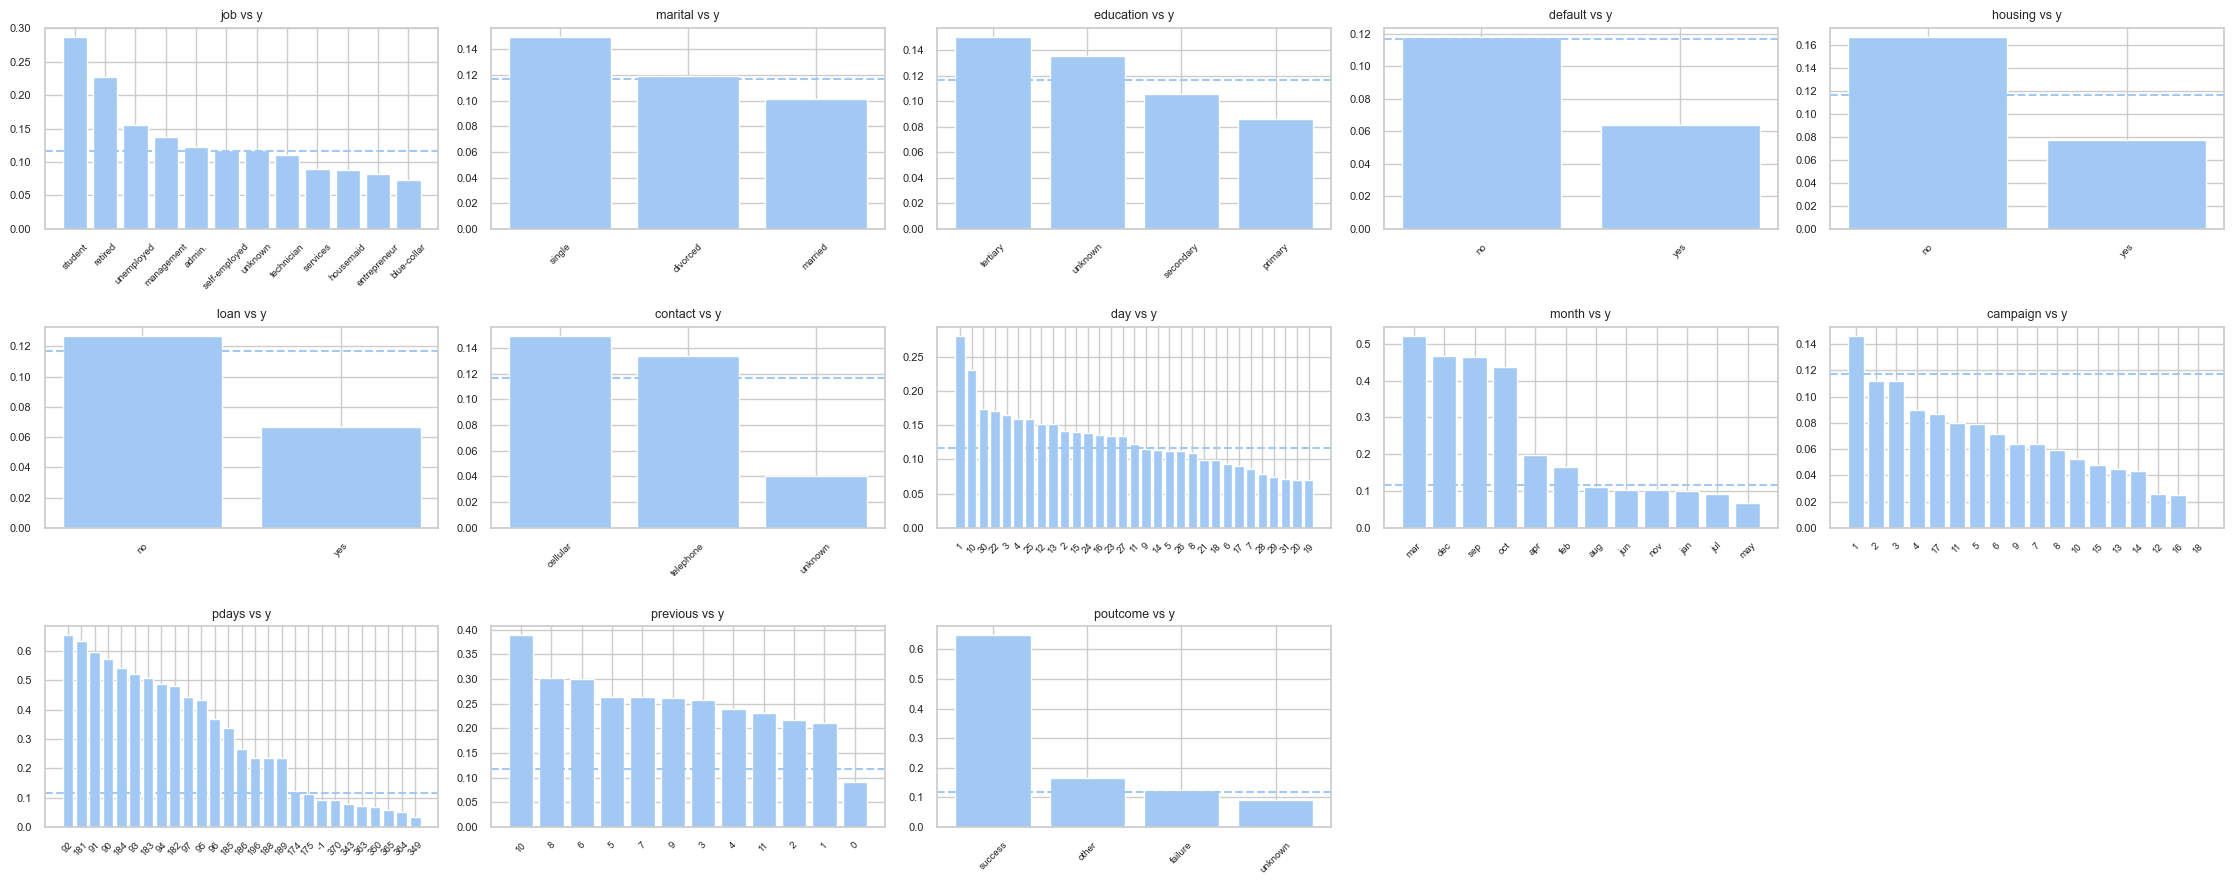

In [91]:
def rate_table(df, cat, target='y_bin', min_count=50):
    g = (df.groupby(cat)[target]
         .agg(['count','mean'])
         .rename(columns={'mean':'rate'}))
    g = g[g['count']>=min_count].copy()
    base = df[target].mean()
    g['se'] = np.sqrt(g['rate']*(1-g['rate'])/g['count'])
    g['ci_low'] = g['rate'] - 1.96*g['se']
    g['ci_high'] = g['rate'] + 1.96*g['se']
    g['lift'] = g['rate']/base
    return g.sort_values('rate', ascending=False)


cats = [x for x in cat_cols if x != 'y' and x != 'y_bin']  
base_rate = df['y_bin'].mean()

for c in cats:
    print(f"\n=== {c} vs y ===")
    display(rate_table(df, c))

per_row = 5
n = len(cats)
nrows = math.ceil(n / per_row)

fig, axes = plt.subplots(nrows, per_row, figsize=(4.5*per_row, 3*nrows))
axes = np.atleast_1d(axes).ravel()

for ax, c in zip(axes, cats):
    t = rate_table(df, c)
    if t.empty:
        ax.axis('off')
        continue

    ax.bar(t.index.astype(str), t['rate'].values)
    ax.axhline(base_rate, linestyle='--')
    ax.set_title(f"{c} vs y", fontsize=9)
    ax.tick_params(axis='x', labelrotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=8)

for ax in axes[len(cats):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


L’analyse des taux de souscription (`y_bin`) selon les différentes variables catégorielles met en évidence des écarts très importants entre groupes. Certains segments de clients sont beaucoup plus susceptibles de souscrire que d’autres, ce qui en fait des variables **hautement discriminantes**.


| Variable     | Observations clés                                                                 | Interprétation |
|--------------|------------------------------------------------------------------------------------|----------------|
| **job**      | Taux de souscription élevés pour *student*, *retired*, *management* ; très faibles pour *blue-collar*, *services*. | Variable fortement discriminante reflétant la situation socio-professionnelle → profils financiers |
| **marital**  | *single* légèrement au-dessus de la moyenne ; *divorced* en dessous ; *married* proche de la moyenne / mariés étant majoritaires dans le dataset, ils écrasent visuellement la variance | Effet modéré mais cohérent du statut marital. |
| **education**| Gradient : *tertiary* > *secondary* > *primary* > *unknown*. | Niveau d’éducation positivement corrélé à la souscription, bon proxy du revenu / stabilité |
| **default**  | Les clients avec `default = yes` présentent un taux de souscription très faible. | Forte contrainte financière → variable très informative. |
| **housing**  | `housing = yes` associé à un taux inférieur à la moyenne. | Endettement immobilier défavorable à la souscription. |
| **loan**     | `loan = yes` présente un taux nettement plus faible. | Endettement en cours → signal négatif fort. |
| **contact**  | *cellular* largement au-dessus de la moyenne ; *telephone* très défavorable. | Le canal de contact influence fortement l’issue de la campagne. |
| **month**    | Mois comme *mar*, *sep*, *oct* très favorables ; *may*, *jul* défavorables. | Effet temporel et stratégie de campagne marqués. |
| **day**      | Taux de souscription décroît quasi monotoniquement avec le jour du mois. Les premiers jours du mois présentent des taux très élevés| contraintes de liquidité en fin de mois, fatigue commerciale côté agents... |
| **campaign** | Taux de souscription décroissant avec le nombre d’appels. | Les appels répétés signalent souvent un refus latent. |
| **pdays**    | Taux élevé pour des valeurs faibles ; très bas pour `pdays = -1`. | Variable historique clé, à recatégoriser (*contacté* / *jamais contacté*). |
| **previous** | `previous > 0` associé à un meilleur taux de souscription. Taux de souscription décroissant avec previous.| L’historique de contact améliore la probabilité de succès. |
| **poutcome** | *success* extrêmement favorable ; *failure* et *unknown* très défavorables. | Variable la plus prédictive du dataset. |
---
##  Conclusion – Pouvoir discriminant des variables

L’analyse des taux de souscription (`y_bin`) selon les différentes variables met en évidence des écarts marqués entre groupes pour certaines variables, tandis que d’autres présentent un pouvoir discriminant plus limité.


###  Variables fortement discriminantes

Ces variables montrent des écarts importants et structurés de taux de souscription entre modalités, et portent une information prédictive majeure :

- **poutcome** : variable la plus discriminante du jeu de données ; une issue passée *success* est associée à un taux de souscription extrêmement élevé, tandis que *failure* et *unknown* sont très défavorables.
- **duration** *(non exploitable en prédiction)* : très fortement corrélée à la cible, mais constitue une fuite d’information (connue après l’appel).
- **job** : fortes disparités selon la catégorie socio-professionnelle (*student*, *retired*, *management* vs *blue-collar*, *services*).
- **education** : gradient clair et monotone (*tertiary* > *secondary* > *primary* > *unknown*).
- **default** : les clients en défaut présentent un taux de souscription quasi nul.
- **contact** : le canal de contact influence fortement l’issue de la campagne (*cellular* très favorable, *telephone* défavorable).
- **month** : effet temporel marqué avec des mois très favorables (*mar*, *sep*, *oct*) et d’autres défavorables (*may*, *jul*).
- **day** : effet intra-mensuel structuré avec un taux de souscription élevé en début de mois et décroissant quasi monotoniquement par la suite.
- **pdays** : taux très élevé pour les valeurs faibles et très faible pour `pdays = -1`, reflétant l’historique de contact.
- **previous** : un nombre de contacts antérieurs strictement positif est associé à une probabilité de souscription plus élevée.


###  Variables modérément discriminantes

Ces variables présentent un effet réel mais plus limité, avec des écarts moins marqués entre modalités :

- **loan** : la présence d’un crédit en cours est associée à un taux de souscription plus faible.
- **housing** : l’endettement immobilier réduit modérément la probabilité de souscription.
- **campaign** : le taux de souscription décroît avec le nombre d’appels, signalant un refus latent, mais l’effet reste progressif.


###  Variables faiblement ou non discriminantes

Ces variables montrent peu de variation du taux de souscription entre modalités et un pouvoir discriminant limité :

- **marital** : effets faibles et proches de la moyenne globale (*single* légèrement au-dessus, *divorced* en dessous).
- **age** : pas de structure discriminante marquée en analyse univariée.
- **balance** : malgré une forte dispersion et des valeurs extrêmes, l’effet sur la souscription est peu structuré.


###  Implications pour la modélisation

- Le signal prédictif est **majoritairement porté par les variables catégorielles et temporelles**.
- Plusieurs relations sont **non linéaires** et **non monotones**, justifiant l’usage de modèles capables de capter des interactions complexes (arbres, boosting).
- Certaines variables très discriminantes nécessitent un **traitement spécifique** (*duration* à exclure, *pdays* à recatégoriser).

Ces conclusions guident directement les choix de **feature engineering** et de **modélisation** à l’étape suivante.


## 4. Redondances (catégorie-catégorie) — Cramér's V

,job,marital,education,default,housing,loan,contact,day,month,poutcome
job,1.000000,0.205425,0.458009,0.033036,0.281311,0.105354,0.149658,0.048112,0.109144,0.062293
marital,0.205425,1.000000,0.121351,0.018044,0.019587,0.051510,0.044598,0.048538,0.070616,0.027919
education,0.458009,0.121351,1.000000,0.013651,0.119062,0.079865,0.122527,0.052746,0.108998,0.034710
default,0.033036,0.018044,0.013651,1.000000,0.003766,0.077092,0.023482,0.018116,0.056564,0.039574
housing,0.281311,0.019587,0.119062,0.003766,1.000000,0.041055,0.213484,0.168623,0.503977,0.142917
loan,0.105354,0.051510,0.079865,0.077092,0.041055,1.000000,0.014853,0.060740,0.182162,0.054645
contact,0.149658,0.044598,0.122527,0.023482,0.213484,0.014853,1.000000,0.199922,0.511901,0.207316
day,0.048112,0.048538,0.052746,0.018116,0.168623,0.060740,0.199922,1.000000,0.328826,0.098090
month,0.109144,0.070616,0.108998,0.056564,0.503977,0.182162,0.511901,0.328826,1.000000,0.213775
poutcome,0.062293,0.027919,0.034710,0.039574,0.142917,0.054645,0.207316,0.098090,0.213775,1.000000


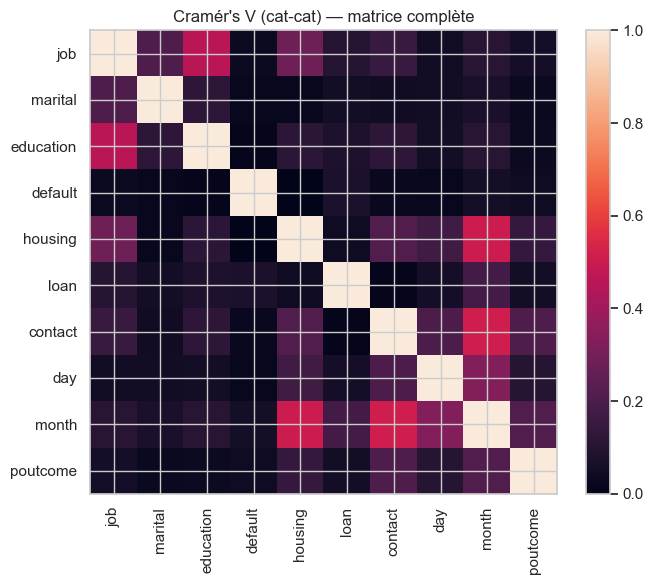

In [95]:
from itertools import combinations
from scipy.stats import chi2_contingency

categ_cols = ["job","marital","education","default","housing","loan","contact","day","month","poutcome"]


def cramers_v(x, y):
    tbl = pd.crosstab(x, y, dropna=False)
    if tbl.shape[0] < 2 or tbl.shape[1] < 2:
        return np.nan
    chi2, _, _, _ = chi2_contingency(tbl, correction=False)
    n = tbl.values.sum()
    if n == 0:
        return np.nan
    phi2 = chi2 / n
    r, k = tbl.shape
    # correction bias 
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min(kcorr-1, rcorr-1)
    return np.sqrt(phi2corr / denom) if denom > 0 else np.nan

# 4) Construire la matrice COMPLETE (pas seulement cats_small)
cv = pd.DataFrame(index=categ_cols, columns=categ_cols, dtype=float)

for a, b in combinations(categ_cols, 2):
    v = cramers_v(df[a], df[b])
    cv.loc[a, b] = v
    cv.loc[b, a] = v

np.fill_diagonal(cv.values, 1.0)

display(cv)

plt.figure(figsize=(7, 6))
plt.imshow(cv.values, vmin=0, vmax=1, aspect="auto")
plt.colorbar()
plt.xticks(range(len(cv.columns)), cv.columns, rotation=90)
plt.yticks(range(len(cv.index)), cv.index)
plt.title("Cramér's V (cat-cat) — matrice complète")
plt.tight_layout()
plt.show()


Dans cette section, l’analyse des dépendances entre variables catégorielles à l’aide de l’indice de Cramér’s V est volontairement restreinte aux variables strictement catégorielles (`job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `day`, `month`, `poutcome`).

Les variables numériques ou hybrides (`campaign`, `pdays`, `previous`) ont été exclues de cette analyse, ayant déjà fait l’objet d’un traitement spécifique dans les sections de corrélations et d’analyses univariées.
Ce choix permet d’éviter les effets de recodage arbitraires et de garantir une interprétation cohérente des dépendances catégorie–catégorie.

La matrice de Cramér’s V met en évidence :
- des dépendances modérées et attendues entre certaines variables (notamment `job`–`education`, `contact`–variables temporelles),
- une absence de dépendance forte proche de 1 hors diagonale.

Ces résultats indiquent une **faible redondance globale entre variables catégorielles** et excluent une multicolinéarité catégorielle sévère.
La majorité des variables apportent donc une information complémentaire, justifiant leur conservation pour la phase de modélisation.


# IV. Analyses orientées modélisation

## 1. Association variables ↔ cible

In [97]:
# Numériques : corrélation point-biserial
pb = []
for c in num_cols:
    if c == 'y_bin':
        continue
    s = df[c].dropna()
    y = df.loc[s.index, 'y_bin']
    r, p = pointbiserialr(y, s)
    pb.append([c, r, p])
pb_df = pd.DataFrame(pb, columns=['var','point_biserial_r','pvalue']).sort_values('point_biserial_r', ascending=False)
print("Top variables numériques (association avec y) :")
display(pb_df.head(10))

# Catégorielles : meilleur lift
cat_rank = {}
for c in cat_cols:
    if c!='y':
        t = (df.groupby(c)['y_bin'].mean())
        if not t.empty:
            cat_rank[c] = t.max() / df['y_bin'].mean()
cat_rank = pd.Series(cat_rank).sort_values(ascending=False)
print("\nClassement (approx.) des variables catégorielles par lift max :")
display(cat_rank.head(10))

Top variables numériques (association avec y) :


,var,point_biserial_r,pvalue
3,duration,0.394521,0.000000e+00
5,pdays,0.103621,3.790553e-108
6,previous,0.093236,7.801830e-88
1,balance,0.052838,2.521114e-29
0,age,0.025155,8.825644e-08
2,day,-0.028348,1.653880e-09
4,campaign,-0.073172,1.012347e-54



Classement (approx.) des variables catégorielles par lift max :


poutcome     5.532800
month        4.444305
job          2.451433
day          2.389226
housing      1.427737
education    1.282764
marital      1.277874
contact      1.275285
loan         1.081827
default      1.008345
dtype: float64

La corrélation point-bisériale est utilisée pour mesurer l’association entre la cible binaire (`y_bin`) et les variables numériques.
Cette analyse est pertinente pour les variables quantitatives ou ordinales assimilables à un continu (`age`, `balance`, `campaign`, `previous`, `pdays`).

La variable `day`, bien que numérique, correspond à un index calendaire et ne constitue pas un continu au sens strict. Son inclusion ici relève d’une analyse exploratoire, la relation observée étant principalement monotone et non linéaire.

## Variables numériques les plus associées à la cible

Les coefficients de corrélation point-bisériale montrent que :

- **`duration`** est de loin la variable la plus corrélée à `y_bin`.  
  Cela confirme que les appels longs aboutissent beaucoup plus souvent à une souscription.  
  **Cependant, cette variable ne doit pas être utilisée en modélisation**, car elle constitue une fuite d’information (connue uniquement après l’appel).

- **`pdays`** et **`previous`** présentent également une association positive et significative avec la cible.  
  Les clients récemment contactés, ou ayant déjà été en interaction avec la banque, souscrivent plus fréquemment.  
  Ces variables capturent un **effet de récence et d’historique relationnel** important.

- **`balance`** montre une association positive modérée.  
  Les clients disposant d’un solde plus élevé ont légèrement plus de chances de souscrire, ce qui peut refléter une meilleure stabilité financière.

- **`campaign`** est négativement corrélée à la cible.  
  Un nombre élevé d’appels est généralement associé à une probabilité plus faible de souscription, suggérant que les contacts répétés traduisent souvent un refus latent.

- **`age`** et **`day`** présentent des associations plus faibles mais statistiquement significatives.  
  Cela suggère une influence modérée, probablement **non linéaire**, qui ne peut être correctement captée par une simple corrélation linéaire.

Globalement, les variables numériques (hors `duration`) montrent des corrélations faibles à modérées indiquant un **pouvoir prédictif limité en univarié** et la présence probable d’effets non linéaires ou d’interactions.

---

## Variables catégorielles les plus discriminantes

Le classement par **lift maximal** met en évidence que :

- **`poutcome`** (résultat de la campagne précédente) est la variable la plus informative.  
  Un client ayant déjà connu un *success* présente un taux de souscription plusieurs fois supérieur au taux moyen, ce qui en fait un prédicteur majeur.

- **`month`** est également très discriminante.  
  Certains mois de campagne concentrent des taux de souscription particulièrement élevés, traduisant un **effet temporel et stratégique fort**.

- **`job`**, **`education`** et **`marital`** segmentent nettement la probabilité de souscription.  
  Les catégories socio-professionnelles et le niveau d’éducation jouent un rôle structurel important dans le comportement des clients.

- **`contact`** oppose fortement *cellular* et *telephone*.  
  Le canal de contact mobile est nettement plus efficace, soulignant l’importance des choix opérationnels de la campagne.

- À l’inverse, **`default`**, **`housing`** et **`loan`** apparaissent moins discriminantes en lift maximal.  
  Leur information est soit déséquilibrée, soit associée à des écarts de taux plus faibles, bien qu’elles restent pertinentes d’un point de vue métier.

---

## Lecture globale

Ces résultats montrent que :
- le signal prédictif est principalement porté par les **variables catégorielles** et l’**historique de contact**,
- les variables numériques classiques ont un pouvoir explicatif plus limité en analyse univariée,
- la relation entre les variables explicatives et la cible est **largement non linéaire**.

Ces constats justifient l’utilisation de modèles capables de capturer des interactions lors de la phase de modélisation.


## 2. Déséquilibre de classe



Taux de 'yes' (base rate) = 0.117


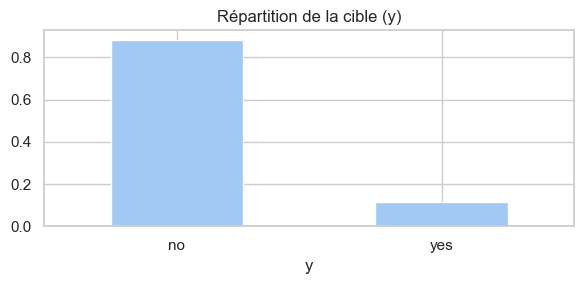

In [103]:
base_rate = df["y_bin"].mean()
print(f"\nTaux de 'yes' (base rate) = {base_rate:.3f}")

fig, ax = plt.subplots(figsize=(6, 3))

(df["y"]
 .value_counts(normalize=True)
 .plot(kind="bar", ax=ax))

ax.set_title("Répartition de la cible (y)")
ax.tick_params(axis="x", labelrotation=0)

plt.tight_layout()
plt.show()


La distribution de la cible est très déséquilibrée :

- seulement **11,3 %** des clients souscrivent (`y = yes`),  
- contre **88,7 %** qui ne souscrivent pas.

##  Importance du déséquilibre pour la modélisation

Ce déséquilibre fort implique que :

- un modèle naïf prédirait “no” dans presque tous les cas,  
- les métriques classiques (accuracy) seront trompeuses,  
- il faudra utiliser :  
  → *ponderation des classes*,  
  → *focal loss*,  
  → *oversampling (SMOTE)* ou  
  → *évaluation au log-loss / AUC*.

Le déséquilibre introduit également un **biais comportemental** :  
le dataset reflète une campagne où le taux de conversion est structurellement très faible.


##  Synthèse : Interprétation & préparation à la modélisation
Cette analyse exploratoire a permis de comprendre en profondeur la structure du jeu de données, la nature des variables et leurs relations avec la cible y_bin (souscription à un dépôt à terme). Elle fournit des enseignements clés pour orienter les choix de modélisation.

**Structure générale des données** 

Le jeu de données ne contient aucune valeur manquante au sens strict, mais plusieurs variables utilisent des codes spécifiques pour représenter une absence d’information :
- pdays = -1 : client jamais contacté auparavant
- poutcome = "unknown" : absence de campagne précédente
- contact = "unknown" ou education = "unknown" : information non renseignée
Ces modalités ne doivent pas être traitées comme des NaN, mais comme des catégories informatives à part entière.

**biais et déséquilibres présents**

- **Très fort déséquilibre de classe** : 11 % de “yes”.  
- **Catégories ultra-dominantes** :  
  - `pdays = 999` (= jamais contacté)  
  - `poutcome = nonexistent`  
  - `marital = married`, `contact = cellular`  , `previous`= 0, `default` = no
- La variable `duration` incorpore une **fuite d’information** : elle dépend du résultat de l’appel.

**Variables les plus pertinentes pour expliquer la cible**

* Variables numériques : distribution et lien avec la cible : 
- `duration` est la variable la plus corrélée à la cible, mais constitue une fuite d’information (data leakage) : elle est connue après l’appel, elle ne doit pas être utilisée en modélisation prédictive.
- `pdays` et `previous` sont informatives car elles capturent l’historique de contact : les clients déjà contactés souscrivent davantage.
- Leur effet est fortement **non linéaire** et dominé par la modalité `pdays = -1` (jamais contacté).
- Ces variables nécessitent donc une **recatégorisation ou transformation** avant modélisation.
- `campaign`, `age` et `balance` présentent un **faible pouvoir discriminant en univarié**. (`balance` et `campaign` nécessitent une transformation en raison de leur forte asymétrie)
- Leur utilité est attendue principalement via des **interactions** ou des **modèles non linéaires**.


* Variables catégorielles : pouvoir discriminant : 
L’analyse des taux de souscription, du lift et des intervalles de confiance à 95 % montre que plusieurs variables catégorielles sont hautement discriminantes : 
- Très discriminantes
  - poutcome : variable la plus informative (succès passé → probabilité de souscription très élevée)
  - contact : fort contraste entre cellular et telephone
  - month : forte saisonnalité (mois favorables et défavorables bien identifiés)
  - job, education : segmentation socio-professionnelle marquée
- Modérément discriminantes
  - housing, loan : l’endettement est associé à une probabilité plus faible de souscription
  - campaign : relation décroissante non linéaire (appels répétés → refus latent)
- Faiblement discriminantes en univarié
  -marital, age, balance : effets faibles ou très dispersés

**Relations entre variables (corrélations & redondances)** 
- Une corrélation structurelle forte existe entre pdays et previous, liée à leur définition 
- L’analyse via Cramér’s V entre variables catégorielles montre : 
  - une faible redondance globale,
  - l’absence de multicolinéarité catégorielle sévère,
  - une information majoritairement complémentaire entre variables.


Ces éléments donnent une vision claire des facteurs déterminants et des biais structurels du dataset, et orientent la préparation du pipeline de modélisation.
